## Entrega Final - Projeto Final APRP

- Pedro Costa
- António Sousa

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
data = pd.read_csv('LoanData_Bondora.csv')

C:\Users\pedro\AppData\Local\Temp\ipykernel_7368\3690109384.py:1: DtypeWarning: Columns (34,38,80,82,83,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('LoanData_Bondora.csv')


In [77]:
data.shape

(179235, 112)

In [78]:
numerical_cols = []
categorical_cols = []
boolean_cols = []

for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        numerical_cols.append(col)
    elif data[col].dtype == 'object':
        categorical_cols.append(col)
    elif data[col].dtype == 'bool':
        boolean_cols.append(col)


print(numerical_cols)
print(categorical_cols)
print(boolean_cols)

['LoanNumber', 'BidsPortfolioManager', 'BidsApi', 'BidsManual', 'ApplicationSignedHour', 'ApplicationSignedWeekday', 'VerificationType', 'LanguageCode', 'Age', 'DateOfBirth', 'Gender', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment', 'County', 'City', 'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus', 'EmploymentPosition', 'OccupationArea', 'HomeOwnershipType', 'IncomeFromPrincipalEmployer', 'IncomeFromPension', 'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare', 'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther', 'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay', 'PlannedPrincipalTillDate', 'PlannedInterestTillDate', 'CurrentDebtDaysPrimary', 'CurrentDebtDaysSecondary', 'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn', 'ProbabilityOfDefault', 'PrincipalOverdueBySchedule', 'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1', 'EAD2', 'Pri

Existem 112 features, mas vamos dar drop a algumas. A justificação é dada na célula seguinte ao código:

Primeiro que tudo vamos dar drop a todas as colunas com mais de 40% de valores em falta.

In [79]:
missing_percentage = data.isnull().mean() * 100

# Filter columns where the percentage of missing values is greater than 40%
filtered_columns = missing_percentage[missing_percentage > 40].index.tolist()

data = data.drop(columns=filtered_columns)

In [80]:
filtered_columns

['ContractEndDate',
 'DateOfBirth',
 'County',
 'City',
 'NrOfDependants',
 'EmploymentPosition',
 'WorkExperience',
 'PlannedPrincipalTillDate',
 'CurrentDebtDaysPrimary',
 'DebtOccuredOn',
 'CurrentDebtDaysSecondary',
 'DebtOccuredOnForSecondary',
 'DefaultDate',
 'PlannedPrincipalPostDefault',
 'PlannedInterestPostDefault',
 'EAD1',
 'EAD2',
 'PrincipalRecovery',
 'InterestRecovery',
 'EL_V0',
 'Rating_V0',
 'EL_V1',
 'Rating_V1',
 'Rating_V2',
 'ActiveLateCategory',
 'CreditScoreEsEquifaxRisk',
 'CreditScoreFiAsiakasTietoRiskGrade',
 'CreditScoreEeMini',
 'PrincipalWriteOffs',
 'InterestAndPenaltyWriteOffs',
 'PreviousEarlyRepaymentsBefoleLoan',
 'GracePeriodStart',
 'GracePeriodEnd',
 'NextPaymentDate',
 'ReScheduledOn',
 'PrincipalDebtServicingCost',
 'InterestAndPenaltyDebtServicingCost',
 'ActiveLateLastPaymentCategory']

As seguintes colunas foram exluidas devido a representarem uma Data. Estas colunas não foram excluidas anteriormente pois não têm mais de 40% de valores em falta, sendo que algumas colunas que representam datas já foram excluidas anteriormente como a coluna ContractEndDate: 
- ReportAsOfEOD
- ListedOnUTC
- BiddingStartedOn
- LoanApplicationStartedDate
- LoanDate
- FirstPaymentDate
- MaturityDate_Original
- MaturityDate_Last
- ApplicationSignedHour
- ApplicationSignedWeekday
- LastPaymentOn
- StageActiveSince
- MonthlyPaymentDay

O resto das colunas representam informação que o grupo acha que não vão contribuir para a classificação, como por exemplo o Username, Número de Loan e o ID.


In [81]:
columns_to_drop = ['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'BiddingStartedOn', 'UserName', 'LoanApplicationStartedDate',
                    'LoanDate', 'FirstPaymentDate', 'MaturityDate_Original', 'MaturityDate_Last', 'ApplicationSignedHour', 'ApplicationSignedWeekday',
                    'Gender', 'LastPaymentOn', 'StageActiveSince', 'NextPaymentNr','NrOfScheduledPayments','MonthlyPaymentDay']

data = data.drop(columns=columns_to_drop)

Existem diversos Incomes, sendo que a soma deles é o IncomeTotal. Portanto vamos excluir os diferentes incomes e ficar apenas com o Income total.

In [82]:
data = data.drop(columns=['IncomeFromChildSupport','IncomeFromFamilyAllowance','IncomeFromLeavePay','IncomeFromPension',
                          'IncomeFromPrincipalEmployer','IncomeFromSocialWelfare','IncomeOther'])

In [83]:
data.shape

(179235, 48)

Existem colunas que numéricas que são na realidade categóricas, por exemplo para a feature Education:
1 - Primary
2 - Basic
3 - Vocational
4 - Secondary
5 - Higher
-1 e 0 - Not present


Vamos portanto fazer a conversão destas colunas antes de passarmos aos outliers.


In [84]:
data.loc[data['Education']==1,"Education"]="Primary"
data.loc[data['Education']==2,"Education"]="Basic"
data.loc[data['Education']==3,"Education"]="Vocational"
data.loc[data['Education']==4,"Education"]="Secondary"
data.loc[data['Education']==5,"Education"]="Higher"
data.loc[data['Education'] == -1.0,"Education"] = 'Not_present'
data.loc[data['Education'] == 0.0,"Education"] = 'Not_present'

data.loc[data['EmploymentStatus']==1,"EmploymentStatus"]="Un-Employed"
data.loc[data['EmploymentStatus']==2,"EmploymentStatus"]="Partially-Employed"
data.loc[data['EmploymentStatus']==3,"EmploymentStatus"]="Fully-Employed"
data.loc[data['EmploymentStatus']==4,"EmploymentStatus"]="Self-Employed"
data.loc[data['EmploymentStatus']==5,"EmploymentStatus"]="Entrepreneur"
data.loc[data['EmploymentStatus']==6,"EmploymentStatus"]="Retiree"
data.loc[data['EmploymentStatus']==-1,"EmploymentStatus"]="Unknown"
data.loc[data['EmploymentStatus']==0,"EmploymentStatus"]="Unknown"

data.loc[data['HomeOwnershipType']==0,"HomeOwnershipType"]="Homeless"
data.loc[data['HomeOwnershipType']==1,"HomeOwnershipType"]="Owner"
data.loc[data['HomeOwnershipType']==2,"HomeOwnershipType"]='Living_with_parents'
data.loc[data['HomeOwnershipType']==3,"HomeOwnershipType"]='Tenant_pre_furnished_property'
data.loc[data['HomeOwnershipType']==4,"HomeOwnershipType"]="Tenant_unfurnished_property"
data.loc[data['HomeOwnershipType']==5,"HomeOwnershipType"]="Council_house"
data.loc[data['HomeOwnershipType']==6,"HomeOwnershipType"]="Joint_tenant"
data.loc[data['HomeOwnershipType']==7,"HomeOwnershipType"]="Joint_Ownership"
data.loc[data['HomeOwnershipType']==8,"HomeOwnershipType"]="Mortgage"
data.loc[data['HomeOwnershipType']==9,"HomeOwnershipType"]='Owner_with_encumbrance'
data.loc[data['HomeOwnershipType']==10,"HomeOwnershipType"]="Other"
data.loc[data['HomeOwnershipType']==-1,"HomeOwnershipType"]="Unknown"

data.loc[data['MaritalStatus']==-1,"MaritalStatus"]="Not_specified"
data.loc[data['MaritalStatus']==0,"MaritalStatus"]="Not_specified"
data.loc[data['MaritalStatus']==1,"MaritalStatus"]="Married"
data.loc[data['MaritalStatus']==2,"MaritalStatus"]="Cohabitant"
data.loc[data['MaritalStatus']==3,"MaritalStatus"]="Single"
data.loc[data['MaritalStatus']==4,"MaritalStatus"]="Divorced"
data.loc[data['MaritalStatus']==5,"MaritalStatus"]="Widow"

data.loc[data['OccupationArea'] == 1,'OccupationArea'] = 'Other'
data.loc[data['OccupationArea'] == 2,'OccupationArea'] = 'Mining'
data.loc[data['OccupationArea'] == 3,'OccupationArea'] = 'Processing'
data.loc[data['OccupationArea'] == 4,'OccupationArea'] = 'Energy'
data.loc[data['OccupationArea'] == 5,'OccupationArea'] = 'Utilities'
data.loc[data['OccupationArea'] == 6,'OccupationArea'] = 'Construction'
data.loc[data['OccupationArea'] == 7,'OccupationArea'] = 'Retail_and_wholesale'
data.loc[data['OccupationArea'] == 8,'OccupationArea'] = 'Transport_and_warehousing'
data.loc[data['OccupationArea'] == 9,'OccupationArea'] = 'Hospitality_and_catering'
data.loc[data['OccupationArea'] == 10,'OccupationArea'] = 'Info_and_telecom'
data.loc[data['OccupationArea'] == 11,'OccupationArea'] = 'Finance_and_insurance'
data.loc[data['OccupationArea'] == 12,'OccupationArea'] = 'Real_estate'
data.loc[data['OccupationArea'] == 13,'OccupationArea'] = 'Research'
data.loc[data['OccupationArea'] == 14,'OccupationArea'] = 'Administrative'
data.loc[data['OccupationArea'] == 15,'OccupationArea'] = 'Civil_service_and_military'
data.loc[data['OccupationArea'] == 16,'OccupationArea'] = 'Education'
data.loc[data['OccupationArea'] == 17,'OccupationArea'] = 'Healthcare_and_social_help'
data.loc[data['OccupationArea'] == 18,'OccupationArea'] = 'Art_and_entertainment'
data.loc[data['OccupationArea'] == 19,'OccupationArea'] = 'Agriculture_forestry_and_fishing'
data.loc[data['OccupationArea'] == -1.0,'OccupationArea'] = 'Not_specified'
data.loc[data['OccupationArea'] == 0.0,'OccupationArea'] = 'Not_specified'

data.loc[data['UseOfLoan'] == -1,'UseOfLoan'] = 'Not_set'
data.loc[data['UseOfLoan'] == 0,'UseOfLoan'] = 'Loan_consolidation'
data.loc[data['UseOfLoan'] == 1,'UseOfLoan'] = 'Real_estate'
data.loc[data['UseOfLoan'] == 2,'UseOfLoan'] = 'Home_improvement'
data.loc[data['UseOfLoan'] == 3,'UseOfLoan'] = 'Business'
data.loc[data['UseOfLoan'] == 4,'UseOfLoan'] = 'Education'
data.loc[data['UseOfLoan'] == 5,'UseOfLoan'] = 'Travel'
data.loc[data['UseOfLoan'] == 6,'UseOfLoan'] = 'Vehicle'
data.loc[data['UseOfLoan'] == 7,'UseOfLoan'] = 'Other'
data.loc[data['UseOfLoan'] == 8,'UseOfLoan'] = 'Health'
data.loc[data['UseOfLoan'] == 101,'UseOfLoan'] = 'Working_capital_financing'
data.loc[data['UseOfLoan'] == 102,'UseOfLoan'] = 'Purchase_of_machinery_equipment'
data.loc[data['UseOfLoan'] == 104,'UseOfLoan'] = 'Accounts_receivable_financing'
data.loc[data['UseOfLoan'] == 106,'UseOfLoan'] = 'Construction_finance'
data.loc[data['UseOfLoan'] == 107,'UseOfLoan'] = 'Acquisition_of_stocks'
data.loc[data['UseOfLoan'] == 108,'UseOfLoan'] = 'Acquisition_of_real_estate'
data.loc[data['UseOfLoan'] == 110,'UseOfLoan'] = 'Other_business'

data.loc[data['VerificationType'] == 0.0,'VerificationType'] = 'Not_set'
data.loc[data['VerificationType'] == 1.0,'VerificationType'] = 'Income_unverified'
data.loc[data['VerificationType'] == 2.0,'VerificationType'] = 'Income_unverified_crossref_phone'
data.loc[data['VerificationType'] == 3.0,'VerificationType'] = 'Income_verified'
data.loc[data['VerificationType'] == 4.0,'VerificationType'] = 'Income_expenses_verified'

data.loc[data['NewCreditCustomer'] == False,'NewCreditCustomer'] = 'Existing_credit_customer'
data.loc[data['NewCreditCustomer'] == True,'NewCreditCustomer'] = 'New_credit_Customer'

data.loc[data['Restructured'] == False,'Restructured']='No'
data.loc[data['Restructured'] == True,'Restructured']='Yes'

Também vamos eliminar os pontos onde o valor da variável Status é Current, pois o que interessa no contexto do trabalho é saber se o Loan vai ou não ser pago.

In [85]:
mask = data['Status'] != 'Current'

data = data[mask]

### Missing Values

In [86]:
numerical_cols = []
categorical_cols = []
boolean_cols = []
missing_percentages = {} 
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        numerical_cols.append(col)
    elif data[col].dtype == 'object':
        categorical_cols.append(col)
    elif data[col].dtype == 'bool':
        boolean_cols.append(col)

    missing_percentage = data[col].isnull().mean() * 100  
    missing_percentages[col] = missing_percentage

print("Missing Value Percentages:")
for col, percentage in missing_percentages.items():
    print(col, ":", percentage)


Missing Value Percentages:
BidsPortfolioManager : 0.0
BidsApi : 0.0
BidsManual : 0.0
NewCreditCustomer : 0.0
VerificationType : 0.04116547698438182
LanguageCode : 0.0
Age : 0.0
Country : 0.0
AppliedAmount : 0.0
Amount : 0.0
Interest : 0.0
LoanDuration : 0.0
MonthlyPayment : 5.483241534319658
UseOfLoan : 0.0
Education : 0.04116547698438182
MaritalStatus : 0.04116547698438182
EmploymentStatus : 0.16630852701690255
EmploymentDurationCurrentEmployer : 0.8447155877195149
OccupationArea : 0.0749211681115749
HomeOwnershipType : 1.3642239072624134
IncomeTotal : 0.0
ExistingLiabilities : 0.0
LiabilitiesTotal : 0.0
RefinanceLiabilities : 0.0
DebtToIncome : 0.04116547698438182
FreeCash : 0.04116547698438182
ActiveScheduleFirstPaymentReached : 0.0
PlannedInterestTillDate : 0.0
ExpectedLoss : 2.1718905656959846
LossGivenDefault : 2.1718905656959846
ExpectedReturn : 2.1718905656959846
ProbabilityOfDefault : 2.1718905656959846
PrincipalOverdueBySchedule : 12.220383497583587
RecoveryStage : 31.3573904

Vamos substituir agora os valores em falta nas colunas categóricas pelo valor mais comum e o valor numérico pela média em colunas numéricas.

In [87]:
for i in data.columns:
    if data[i].dtype == 'object':
        # For categorical column
        most_frequent_value = data[i].mode()[0]
        data[i].fillna(most_frequent_value,inplace=True)
    if data[i].dtype in ['int64','float64']:
        # For numerical column
        mean_value = data[i].mean()
        data[i].fillna(mean_value,inplace=True)

### Outliers

In [88]:
def calculate_outlier_percentage(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    outlier_percentage = (len(outliers) / len(column)) * 100
    
    return outlier_percentage

for i in numerical_cols:
    print('Percentage Outliers in '+ i + ':'+ str(calculate_outlier_percentage(data[i])))

Percentage Outliers in BidsPortfolioManager:8.18945999127292
Percentage Outliers in BidsApi:16.751055894484647
Percentage Outliers in BidsManual:7.384263261458411
Percentage Outliers in LanguageCode:0.25028610006504143
Percentage Outliers in Age:0.04116547698438182
Percentage Outliers in AppliedAmount:3.524588139402771
Percentage Outliers in Amount:3.574810021323717
Percentage Outliers in Interest:3.219963609718346
Percentage Outliers in LoanDuration:0.0
Percentage Outliers in MonthlyPayment:5.124278575015849
Percentage Outliers in IncomeTotal:4.494446777154807
Percentage Outliers in ExistingLiabilities:6.62517186586641
Percentage Outliers in LiabilitiesTotal:4.987609191427701
Percentage Outliers in RefinanceLiabilities:7.3677970706646585
Percentage Outliers in DebtToIncome:19.929854027218614
Percentage Outliers in FreeCash:23.922081985163963
Percentage Outliers in PlannedInterestTillDate:7.764632268794099
Percentage Outliers in ExpectedLoss:3.872024765150954
Percentage Outliers in Los

### Duplicados

In [89]:
duplicates_percentage = (data.duplicated().sum() / len(data)) * 100

print(f"The percentage of duplicates in the DataFrame is: {duplicates_percentage}%")

The percentage of duplicates in the DataFrame is: 0.0%


In [90]:
columns_with_negatives = []
for i in numerical_cols:
    if data[i].lt(0).any():
        columns_with_negatives.append(i)

columns_with_negatives

['FreeCash', 'ExpectedReturn', 'PrincipalBalance', 'InterestAndPenaltyBalance']

In [91]:
data['FreeCash']

0           10.92
1           78.80
2          349.43
3          449.47
4           95.81
           ...   
179230    1393.89
179231       5.51
179232      67.92
179233      11.29
179234     116.38
Name: FreeCash, Length: 121461, dtype: float64

### EDA

In [92]:
data['Status'].describe()

count     121461
unique         2
top         Late
freq       68574
Name: Status, dtype: object

In [93]:
describe_table = data[numerical_cols].describe().transpose()
describe_table.columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

describe_table

count         mean           std  \
BidsPortfolioManager                    121461.0   963.968270   1363.794909   
BidsApi                                 121461.0    29.737652    153.663101   
BidsManual                              121461.0   543.546900    756.765106   
LanguageCode                            121461.0     2.974370      1.983746   
Age                                     121461.0    39.990993     12.326199   
AppliedAmount                           121461.0  2723.155439   2371.562360   
Amount                                  121461.0  2522.255902   2157.411853   
Interest                                121461.0    38.126434     26.750151   
LoanDuration                            121461.0    45.933435     15.810164   
MonthlyPayment                          121461.0   122.209744    114.251642   
IncomeTotal                             121461.0  1791.797355   6172.816303   
ExistingLiabilities                     121461.0     2.970097      3.290426   
LiabilitiesTotal                        121461.0   571.417748  35604.420624   
RefinanceLiabilities                    121461.0     0.199636      0.925031   
DebtToIncome                            121461.0     8.156588     16.515079   
FreeCash                                121461.0   130.790756    725.381807   
PlannedInterestTillDate                 121461.0  1297.787620   1647.905998   
ExpectedLoss                            121461.0     0.158596      0.119407   
LossGivenDefault                        121461.0     0.421786      0.313552   
ExpectedReturn                          121461.0     0.140093      0.077546   
ProbabilityOfDefault                    121461.0     0.260374      0.147092   
PrincipalOverdueBySchedule              121461.0   510.337610    955.921373   
RecoveryStage                           121461.0     1.674215      0.388296   
ModelVersion                            121461.0     4.768446      3.779268   
PrincipalPaymentsMade                   121461.0  1192.930346   1666.492459   
InterestAndPenaltyPaymentsMade          121461.0   565.108661    914.532037   
PrincipalBalance                        121461.0  1289.897057   1866.667372   
InterestAndPenaltyBalance               121461.0  1346.292701   3472.954984   
NoOfPreviousLoansBeforeLoan             121461.0     1.288194      2.189651   
AmountOfPreviousLoansBeforeLoan         121461.0  2581.428835   4366.593876   
PreviousRepaymentsBeforeLoan            121461.0   929.762390   1666.531110   
PreviousEarlyRepaymentsCountBeforeLoan  121461.0     0.067532      0.361106   

                                                min         25%          50%  \
BidsPortfolioManager                       0.000000  145.000000   456.000000   
BidsApi                                    0.000000    0.000000     0.000000   
BidsManual                                 0.000000   69.000000   294.000000   
LanguageCode                               1.000000    1.000000     3.000000   
Age                                        0.000000   30.000000    38.000000   
AppliedAmount                             10.000000  740.000000  2125.000000   
Amount                                     6.390000  740.000000  2125.000000   
Interest                                   2.000000   22.200000    32.140000   
LoanDuration                               1.000000   36.000000    48.000000   
MonthlyPayment                             0.000000   39.190000   106.730000   
IncomeTotal                                0.000000  900.000000  1300.000000   
ExistingLiabilities                        0.000000    1.000000     2.000000   
LiabilitiesTotal                           0.000000   55.000000   308.400000   
RefinanceLiabilities                       0.000000    0.000000     0.000000   
DebtToIncome                               0.000000    0.000000     0.000000   
FreeCash                               -2332.000000    0.000000     0.000000   
PlannedInterestTillDate                    0.000000  262.270000   601.60000

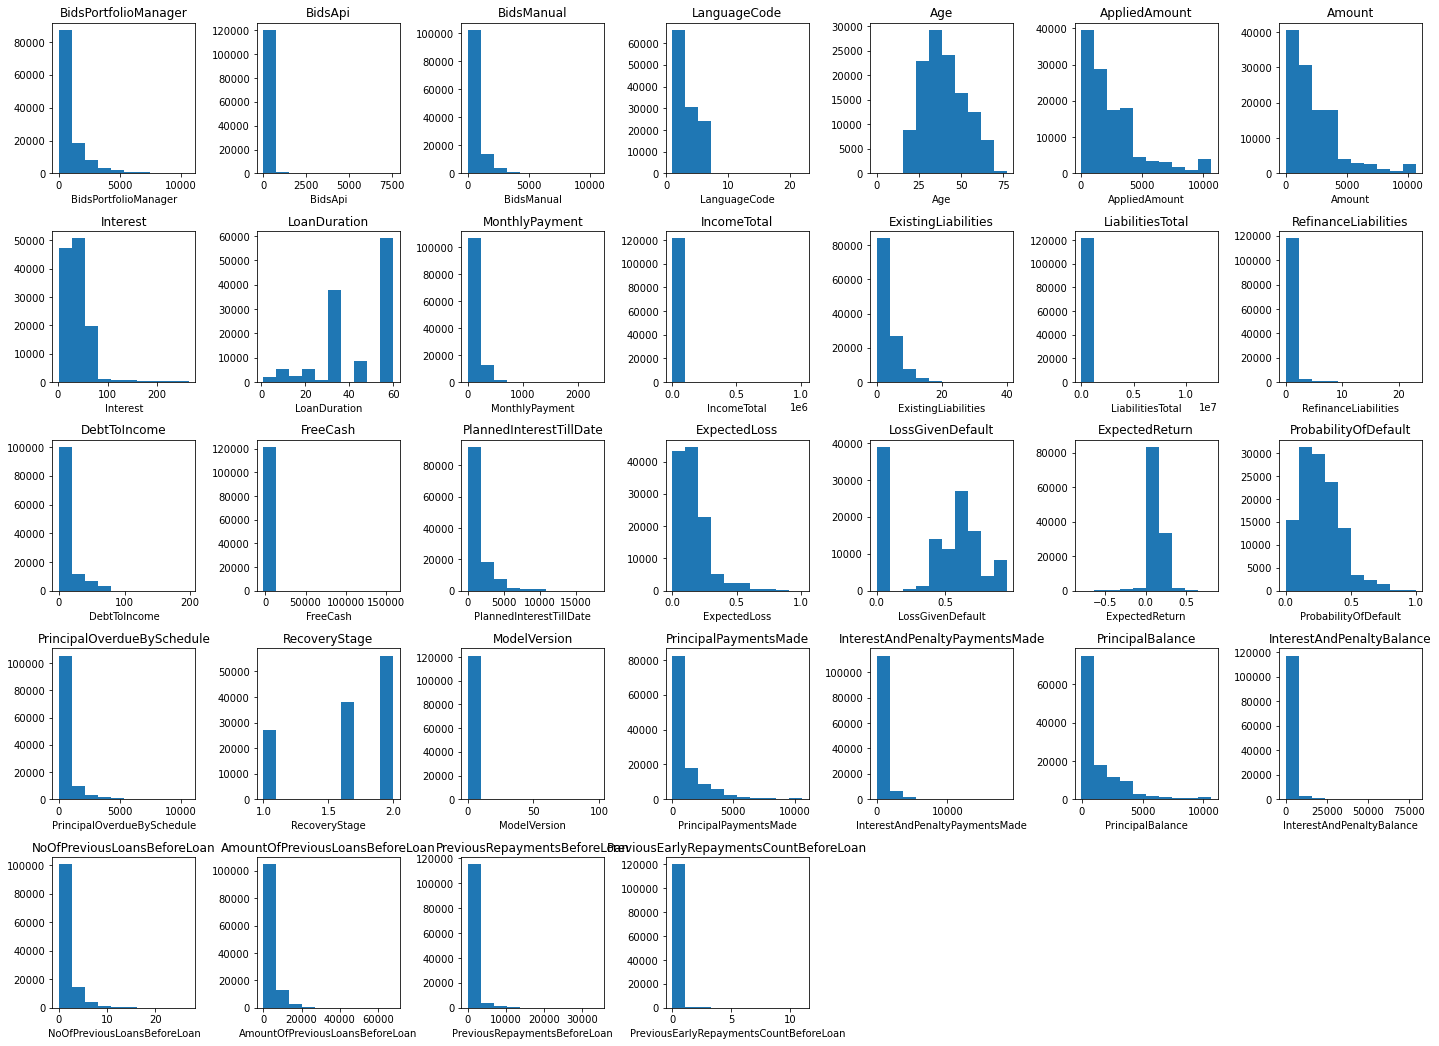

In [94]:
status_colors = {'Late': 'red', 'Repaid':'green'}
fig, axes = plt.subplots(7, 7, figsize=(20, 20))
axes = axes.flatten()


for i, column in enumerate(numerical_cols):
    ax = axes[i]  # Get the current axis
    ax.hist(data[column])
    ax.set_xlabel(column)  # Set x-axis label
    ax.set_title(f'{column}')  # Set subplot title

if len(numerical_cols) < 7*7:
    for ax in axes[len(numerical_cols):]:
        ax.remove()

plt.tight_layout()
plt.show()

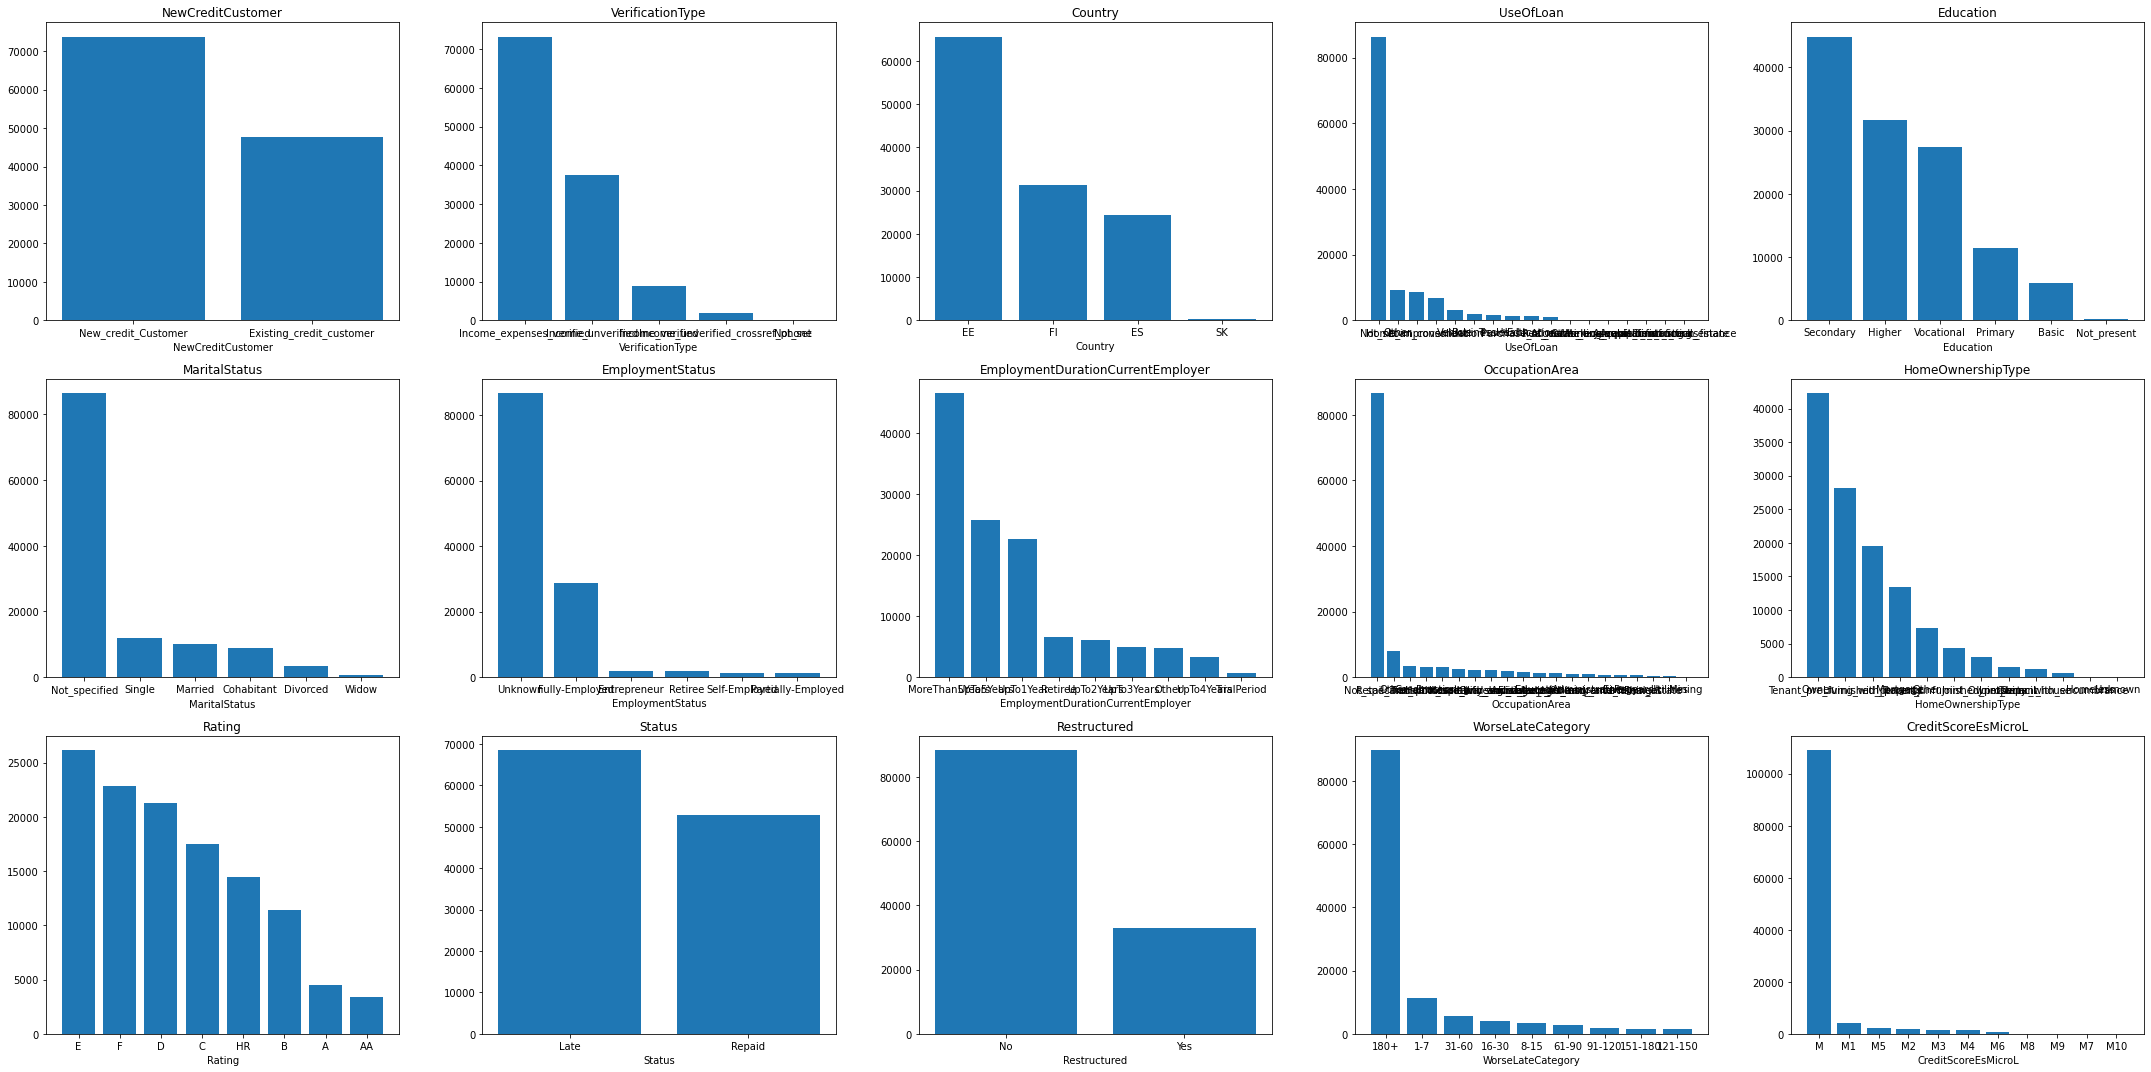

In [95]:
status_colors = {'Late': 'red', 'Repaid':'green'}
fig, axes = plt.subplots(3, 5, figsize=(30, 15))
axes = axes.flatten()


for i, column in enumerate(categorical_cols):
    ax = axes[i]  # Get the current axis
    category_counts = data[column].value_counts()
    ax.bar(category_counts.index,category_counts.values)
    ax.set_xlabel(column)  # Set x-axis label
    ax.set_title(f'{column}')  # Set subplot title

if len(numerical_cols) < 7*7:
    for ax in axes[len(numerical_cols):]:
        ax.remove()

plt.tight_layout()
plt.show()

<AxesSubplot:>

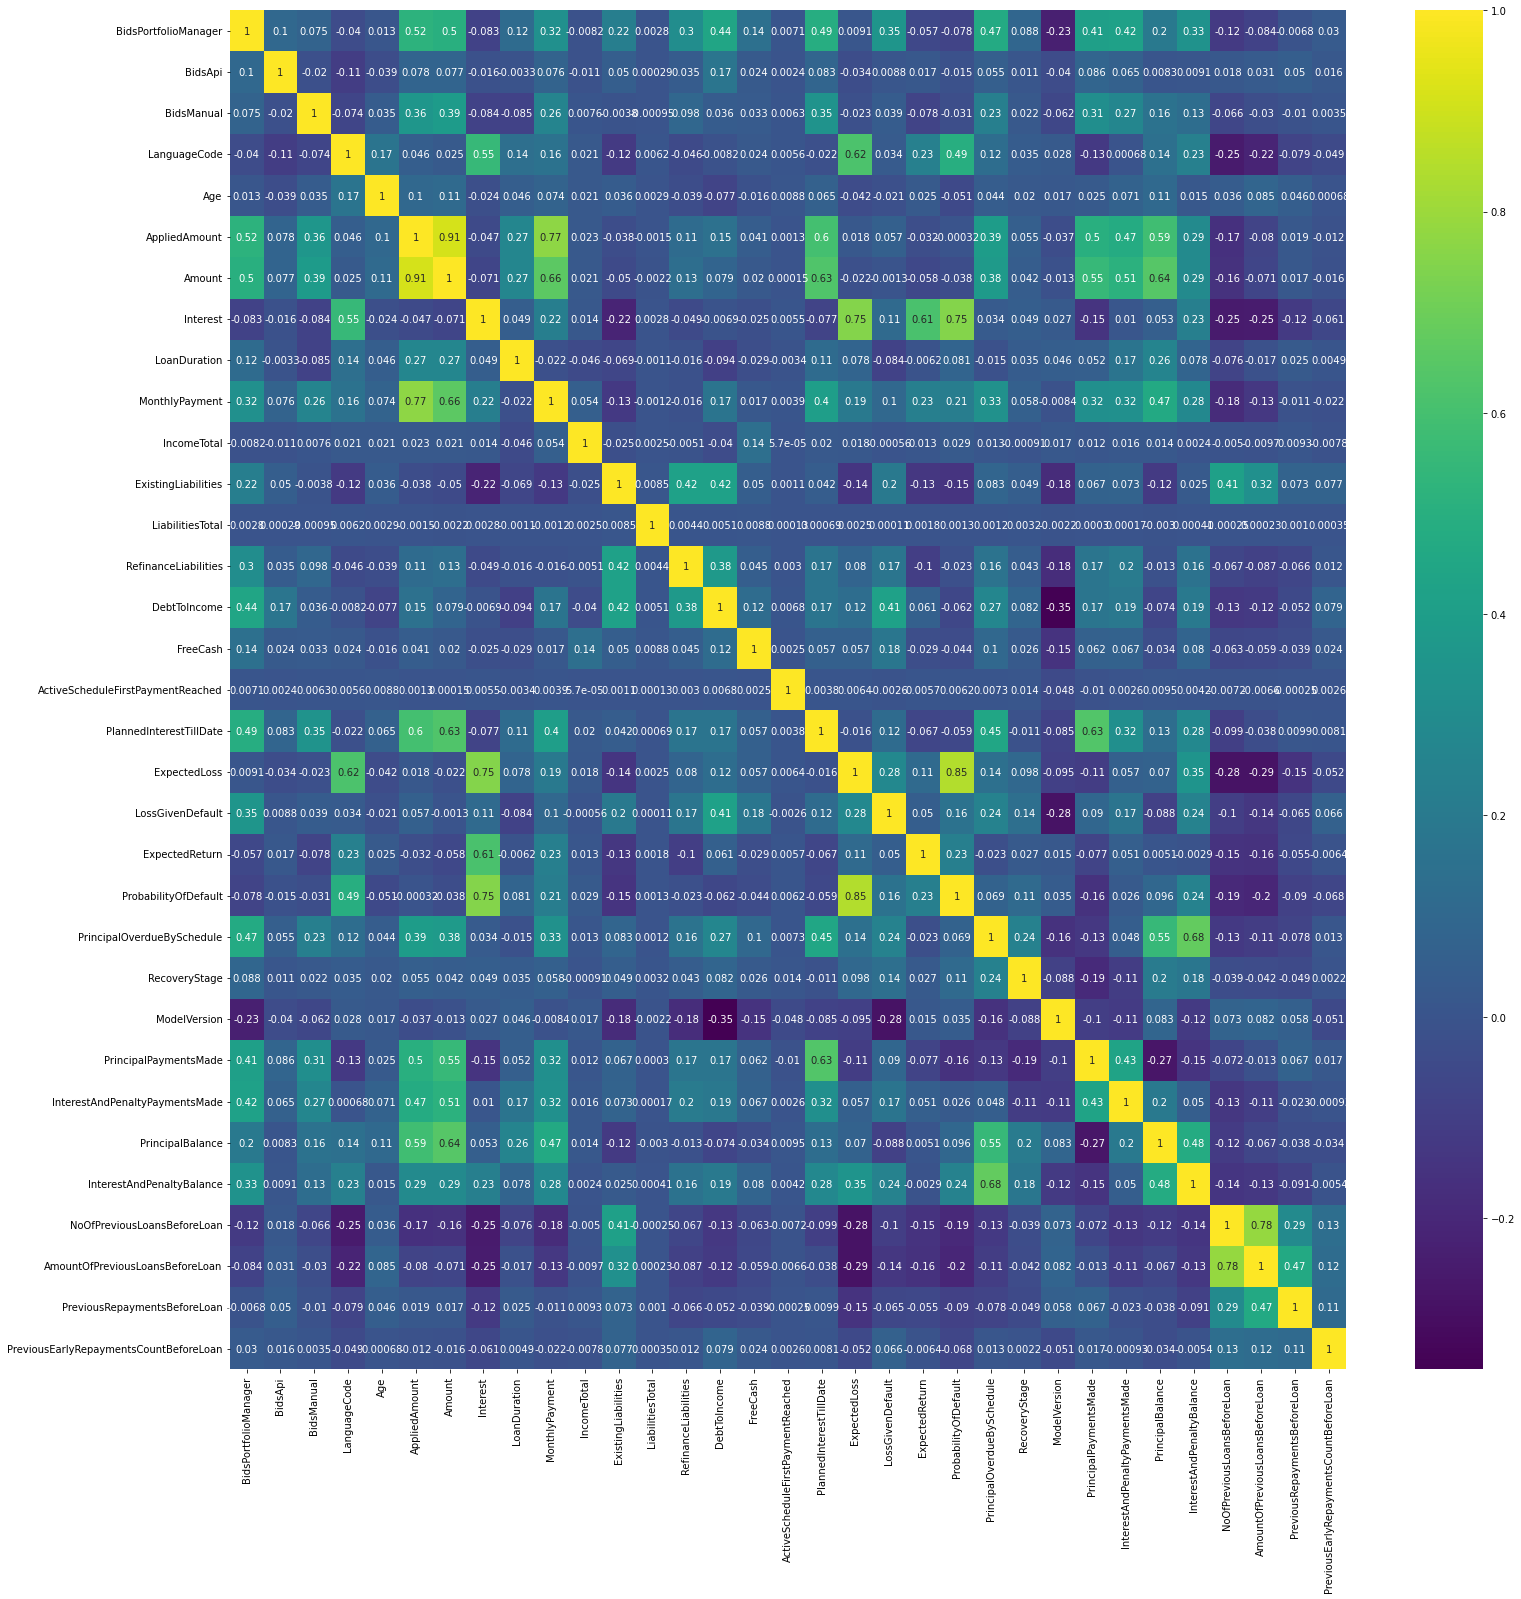

In [96]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

## Naive Bayes

In [97]:
data.shape

(121461, 48)

In [98]:
# columns_with_negative_values = data.columns[data.lt(0).any()].tolist()

cols_neg = []
for i in numerical_cols:
    if(data[i].lt(0).any()):
        cols_neg.append(i)


for column in cols_neg:
    most_common_value = data[column].value_counts().idxmax()  # Find the most common value
    data[column] = data[column].mask(data[column] < 0, most_common_value)  # Replace negative values

In [99]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in categorical_cols:
    encoded_column = label_encoder.fit_transform(data[column]) 
    data[column] = encoded_column

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from pgmpy.estimators import BayesianEstimator
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator


In [101]:
X = data.loc[:, data.columns != 'Status']
y = data['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)




In [102]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

status_pred = naive_bayes.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score, f1_score

acc = accuracy_score(y_test, status_pred)
f11 = f1_score(y_test, status_pred,average='macro')


In [104]:
acc

0.9819205690574985

In [105]:
f11

0.9815919886118057

### Bayes Net

Vamos usar o HillClimbSearch com 5000 samples para criar a estrutura da rede, utilizando o BicScore como scoring method. Depois vamos fazer então fit aos nossos dados. 

In [106]:
from pgmpy.estimators import HillClimbSearch, BicScore, K2Score

num_samples = 5000

subset_data = data.sample(n=num_samples, random_state=42)


hc = HillClimbSearch(subset_data)
scoring_method = BicScore(subset_data)
best_model = hc.estimate(scoring_method)
print(best_model.edges())


  0%|          | 0/1000000 [00:00<?, ?it/s]

[('NewCreditCustomer', 'ExistingLiabilities'), ('NewCreditCustomer', 'Rating'), ('NewCreditCustomer', 'Restructured'), ('NewCreditCustomer', 'Country'), ('NewCreditCustomer', 'PreviousEarlyRepaymentsCountBeforeLoan'), ('LanguageCode', 'Education'), ('Country', 'LanguageCode'), ('Country', 'Rating'), ('Country', 'RecoveryStage'), ('Country', 'VerificationType'), ('MaritalStatus', 'EmploymentStatus'), ('MaritalStatus', 'ModelVersion'), ('MaritalStatus', 'EmploymentDurationCurrentEmployer'), ('MaritalStatus', 'HomeOwnershipType'), ('MaritalStatus', 'RefinanceLiabilities'), ('EmploymentStatus', 'UseOfLoan'), ('OccupationArea', 'MaritalStatus'), ('RecoveryStage', 'Status'), ('RecoveryStage', 'Restructured'), ('ModelVersion', 'VerificationType'), ('ModelVersion', 'LoanDuration'), ('ModelVersion', 'CreditScoreEsMicroL'), ('Status', 'Restructured'), ('WorseLateCategory', 'RecoveryStage'), ('WorseLateCategory', 'Status'), ('CreditScoreEsMicroL', 'Country'), ('NoOfPreviousLoansBeforeLoan', 'NewC

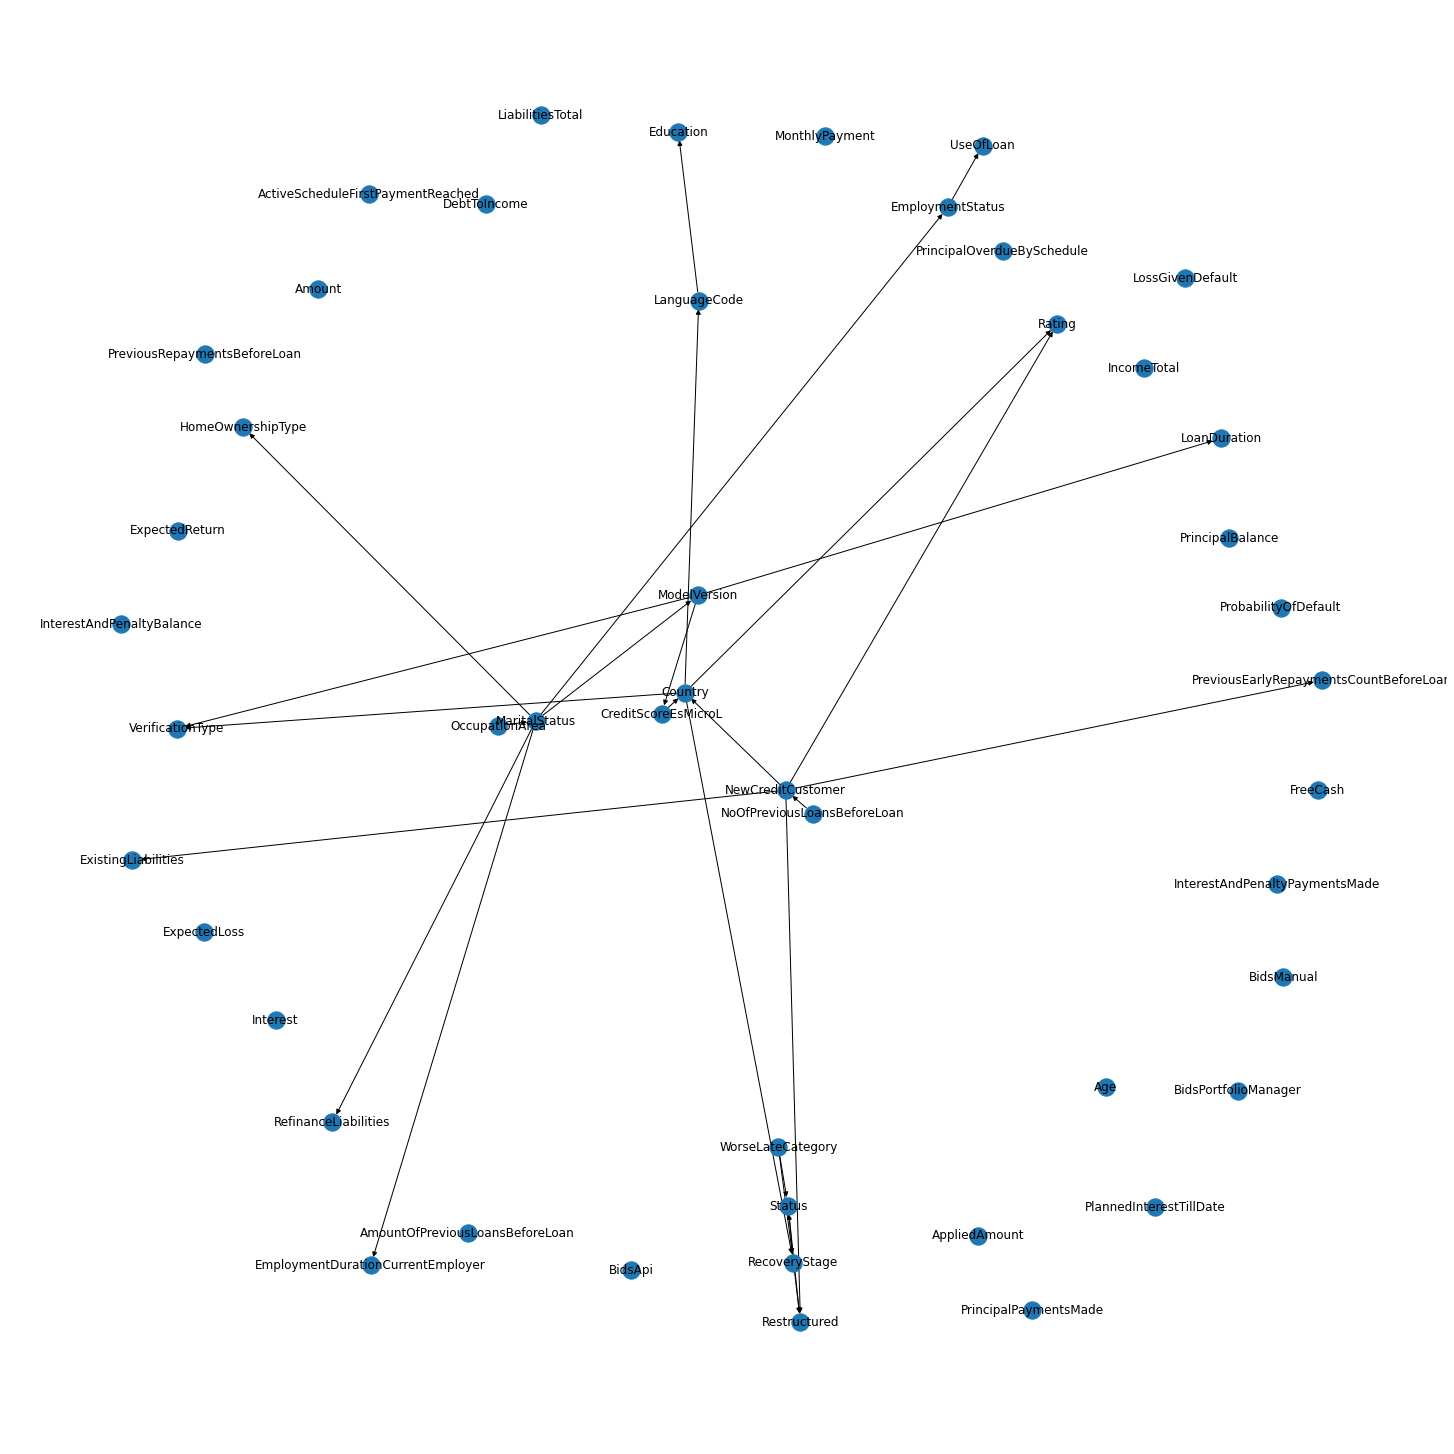

In [107]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph to represent the Bayesian network
G = nx.DiGraph()
for node in best_model.nodes():
    G.add_node(node)
for edge in best_model.edges():
    G.add_edge(*edge)

# Draw the graph

plt.figure(figsize=(20,20))
nx.draw(G, with_labels=True)
plt.show()

In [108]:
data.shape

(121461, 48)

In [109]:
from pgmpy.models import BayesianModel

model = BayesianModel(best_model.edges())

model.fit(data)


c:\Users\pedro\Anaconda3\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [110]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
q = infer.query(variables=['Status'],evidence={'Rating':1})
print(q.values.argmax())
print(q)

0
+-----------+---------------+
| Status    |   phi(Status) |
+===========+===============+
| Status(0) |        0.5075 |
+-----------+---------------+
| Status(1) |        0.4925 |
+-----------+---------------+


c:\Users\pedro\Anaconda3\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [111]:
all_nodes = set(model.nodes())
len(all_nodes)

23

In [112]:
status_pred_model = []
for i in range(len(X_test)):
    try:
        linha = X_test.iloc[i]
        evidenc = linha.to_dict()
        filtered_dict = {key: value for key, value in evidenc.items() if key  in all_nodes}
        query  = infer.query(variables=['Status'],evidence=filtered_dict)
        status_predicted_model = query.values.argmax()
        status_pred_model.append(status_predicted_model)
    except Exception as e:
        print(str(i) + ' : ' + filtered_dict)

In [113]:
accuracy_score(y_test,status_pred_model)

0.8278666930119212

### Inferencias

In [114]:
model.nodes

NodeView(('NewCreditCustomer', 'ExistingLiabilities', 'Rating', 'Restructured', 'Country', 'PreviousEarlyRepaymentsCountBeforeLoan', 'LanguageCode', 'Education', 'RecoveryStage', 'VerificationType', 'MaritalStatus', 'EmploymentStatus', 'ModelVersion', 'EmploymentDurationCurrentEmployer', 'HomeOwnershipType', 'RefinanceLiabilities', 'UseOfLoan', 'OccupationArea', 'Status', 'LoanDuration', 'CreditScoreEsMicroL', 'WorseLateCategory', 'NoOfPreviousLoansBeforeLoan'))

In [119]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
q = infer.query(variables=['Status'],evidence={'LoanDuration':3})
print(q)
q = infer.query(variables=['Status'],evidence={'Education':0})
print(q)
q = infer.query(variables=['Status'],evidence={'Education':5,'MaritalStatus':1})
print(q)
q = infer.query(variables=['Status'],evidence={'MaritalStatus':1})
print(q)
q = infer.query(variables=['Status'],evidence={'MaritalStatus':3})
print(q)


+-----------+---------------+
| Status    |   phi(Status) |
+===========+===============+
| Status(0) |        0.5623 |
+-----------+---------------+
| Status(1) |        0.4377 |
+-----------+---------------+
+-----------+---------------+
| Status    |   phi(Status) |
+===========+===============+
| Status(0) |        0.5396 |
+-----------+---------------+
| Status(1) |        0.4604 |
+-----------+---------------+
+-----------+---------------+
| Status    |   phi(Status) |
+===========+===============+
| Status(0) |        0.5764 |
+-----------+---------------+
| Status(1) |        0.4236 |
+-----------+---------------+
+-----------+---------------+
| Status    |   phi(Status) |
+===========+===============+
| Status(0) |        0.5691 |
+-----------+---------------+
| Status(1) |        0.4309 |
+-----------+---------------+
+-----------+---------------+
| Status    |   phi(Status) |
+===========+===============+
| Status(0) |        0.5547 |
+-----------+---------------+
| Status(1

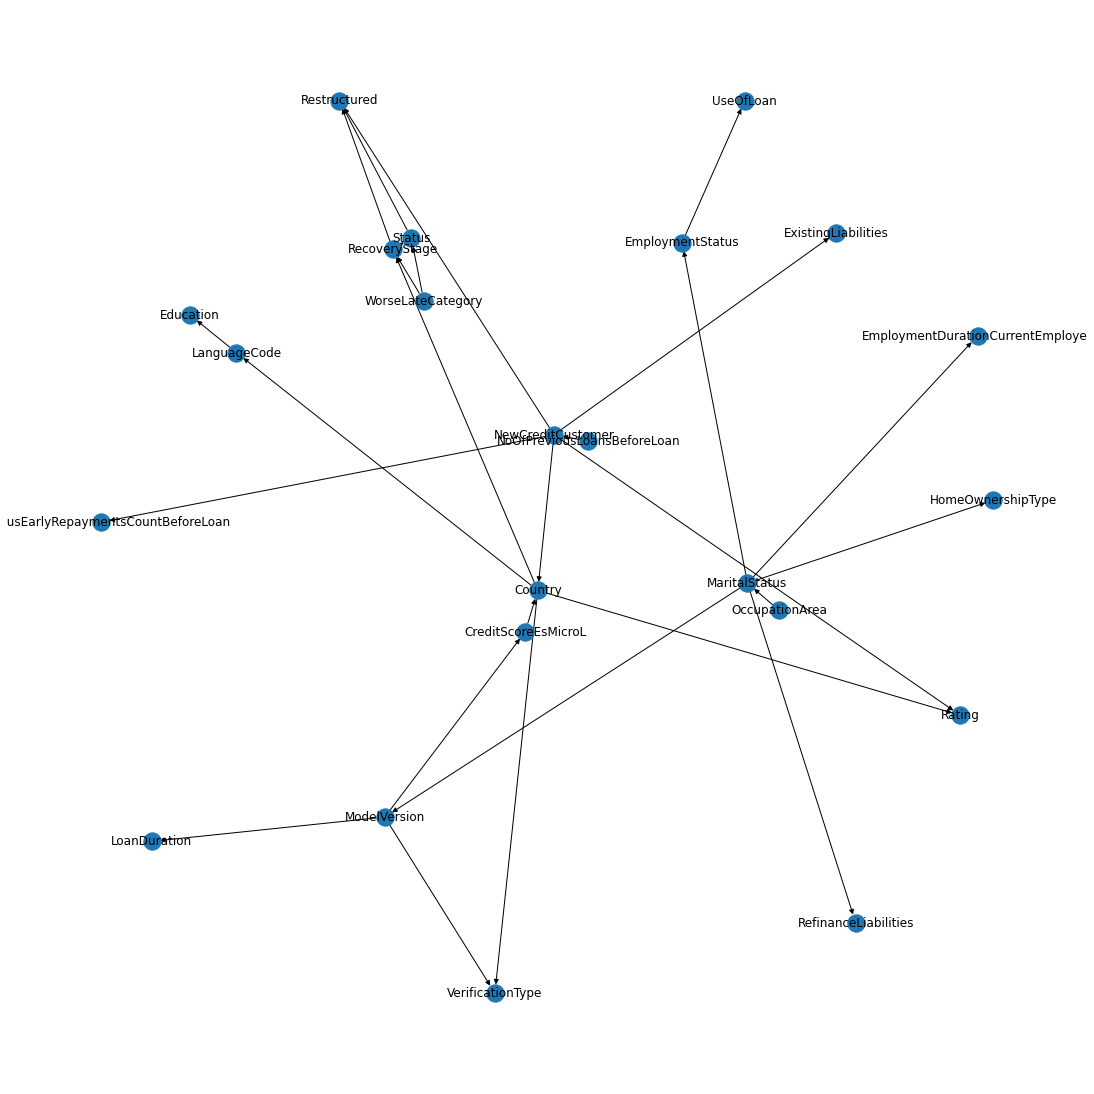

In [117]:
G = nx.DiGraph()
for node in model.nodes():
    G.add_node(node)
for edge in model.edges():
    G.add_edge(*edge)

# Draw the graph

plt.figure(figsize=(15,15))
nx.draw(G, with_labels=True)
plt.show()